**Temas Selectos de Ingenieria III**
# Sebastián González Juárez
Practica 6.

In [1]:
!pip -q install "qiskit>=1.1,<2" matplotlib

import qiskit
import numpy as np
from qiskit import QuantumCircuit
from qiskit.circuit.library import QFT
import qiskit.quantum_info as qi

print("Qiskit version:", qiskit.__version__)

Qiskit version: 1.4.5


In [2]:
def sample_counts_from_statevector(circuit, shots=5000):
    circ_nom = circuit.remove_final_measurements(inplace=False)
    sv = qi.Statevector.from_instruction(circ_nom)
    return sv.sample_counts(shots=shots)

def bitstring(i, n):
    return format(i, f"0{n}b")

# 1. Implementa "a mano" la QFT inversa:

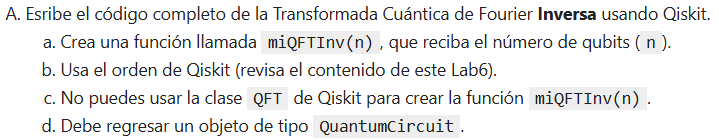

In [3]:
def miQFTInv(n: int) -> QuantumCircuit:
    qc = QuantumCircuit(n, name="miQFTInv")

    for i in range(n // 2):
        qc.swap(i, n - 1 - i)

    for j in range(n):
        for m in range(j):
            theta = -np.pi / (2 ** (j - m))
            qc.cp(theta, m, j)
        qc.h(j)

    return qc

test_circ = miQFTInv(4)
print(test_circ)

        ┌───┐                                                            »
q_0: ─X─┤ H ├─■──────────────■───────────────────■───────────────────────»
      │ └───┘ │P(-π/2) ┌───┐ │                   │                       »
q_1: ─┼───X───■────────┤ H ├─┼─────────■─────────┼──────────────■────────»
      │   │            └───┘ │P(-π/4)  │P(-π/2)  │        ┌───┐ │        »
q_2: ─┼───X──────────────────■─────────■─────────┼────────┤ H ├─┼────────»
      │                                          │P(-π/8) └───┘ │P(-π/4) »
q_3: ─X──────────────────────────────────────────■──────────────■────────»
                                                                         »
«                    
«q_0: ───────────────
«                    
«q_1: ───────────────
«                    
«q_2: ─■─────────────
«      │P(-π/2) ┌───┐
«q_3: ─■────────┤ H ├
«               └───┘


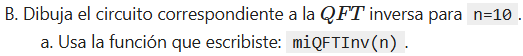

In [4]:
n_demo = 10
circ_demo = miQFTInv(n_demo)

try:
    circ_demo.draw('mpl')
except Exception:
    print(circ_demo)

        ┌───┐                                                            »
q_0: ─X─┤ H ├─■──────────────■───────────────────■───────────────────────»
      │ └───┘ │P(-π/2) ┌───┐ │                   │                       »
q_1: ─┼───X───■────────┤ H ├─┼─────────■─────────┼──────────────■────────»
      │   │            └───┘ │P(-π/4)  │P(-π/2)  │        ┌───┐ │        »
q_2: ─┼───┼──────X───────────■─────────■─────────┼────────┤ H ├─┼────────»
      │   │      │                               │P(-π/8) └───┘ │P(-π/4) »
q_3: ─┼───┼──────┼───────X───────────────────────■──────────────■────────»
      │   │      │       │                                               »
q_4: ─┼───┼──────┼───────┼──────X────────────────────────────────────────»
      │   │      │       │      │                                        »
q_5: ─┼───┼──────┼───────┼──────X────────────────────────────────────────»
      │   │      │       │                                               »
q_6: ─┼───┼──────┼───────

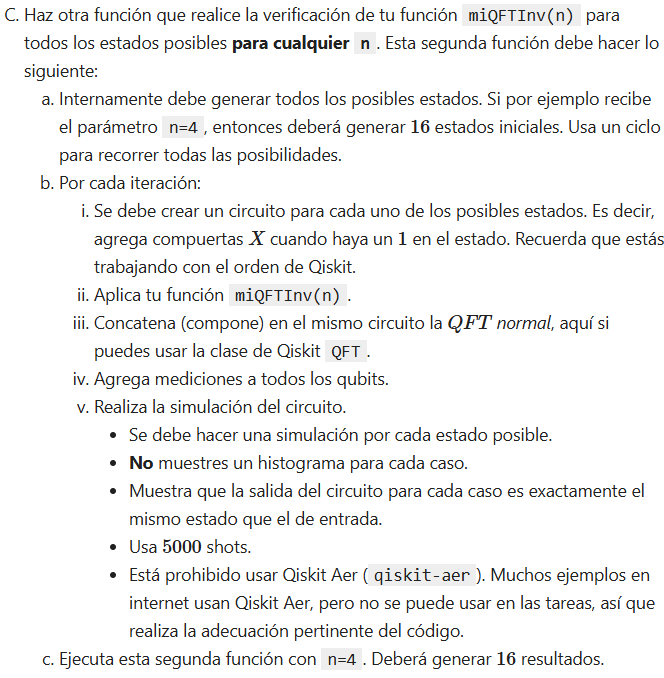

In [5]:
def verifica_miQFTInv(n: int, shots: int = 5000):
    resultados = []
    for i in range(2**n):
        qc = QuantumCircuit(n, n, name=f"check_{bitstring(i,n)}")

        for q in range(n):
            if (i >> q) & 1:
                qc.x(q)

        qc.compose(miQFTInv(n), inplace=True)
        qc.compose(QFT(num_qubits=n, do_swaps=True), inplace=True)

        for q in range(n):
            qc.measure(q, n - 1 - q)

        counts = sample_counts_from_statevector(qc, shots=shots)

        top = max(counts.items(), key=lambda kv: kv[1])[0]
        expect = bitstring(i, n)
        resultados.append((expect, top, top == expect, counts))
    return resultados

# Ejecutar verificación para n=4 (16 casos)
ver_res = verifica_miQFTInv(4, shots=5000)

print("Input   -> Output  | OK   | (conteo mayoritario)")
for inp, out, ok, counts in ver_res:
    print(f"{inp} -> {out}  | {str(ok):5} | {counts[out]}/{sum(counts.values())}")

print("\nÉxito global:", all(r[2] for r in ver_res))

Input   -> Output  | OK   | (conteo mayoritario)
0000 -> 0000  | True  | 5000/5000
0001 -> 0001  | True  | 5000/5000
0010 -> 0010  | True  | 5000/5000
0011 -> 0011  | True  | 5000/5000
0100 -> 0100  | True  | 5000/5000
0101 -> 0101  | True  | 5000/5000
0110 -> 0110  | True  | 5000/5000
0111 -> 0111  | True  | 5000/5000
1000 -> 1000  | True  | 5000/5000
1001 -> 1001  | True  | 5000/5000
1010 -> 1010  | True  | 5000/5000
1011 -> 1011  | True  | 5000/5000
1100 -> 1100  | True  | 5000/5000
1101 -> 1101  | True  | 5000/5000
1110 -> 1110  | True  | 5000/5000
1111 -> 1111  | True  | 5000/5000

Éxito global: True
